# **Automatidata Project**


Welcome to the Automatidata Project!

Automatidata is a fictional data consulting firm. Their client, the New York City Taxi and Limousine Commission (New York City TLC), has hired the Automatidata team for its reputation in helping their clients develop data-based solutions. The objective is to build machine learning model for estimation of taxi fares based on relevant variables in the dataset.


# Inspect and analyze data 
  
**The goal** is to perform a cursory inspection of the provided dataset. 
<br/>  






<img src="Pace.png" width="100" height="100" align=left>

# **PACE stages**

Throughout this notebooks, you'll see references to the problem-solving framework PACE. 

<img src="Plan.png" width="100" height="100" align=left>


## PACE: **Plan**

After providing the Project proposal we move towards understanding the data more and its relevant variables and move towards Analyze stage. The Plan and Analyze stages are usually interconnected. 

Begin by exploring the dataset and reviewing the Data Dictionary. We can prepare to understand the information by reading the taxi cab data fields and understanding the impact of each one. Reviewing the fact sheet could also provide helpful background information. However, the primary goal is to get the data into Python, inspect it, and checking for anaomalies

<img src="Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**



In [67]:
import pandas as pd              
import numpy as np                
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [ ]:
#Load the dataset
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

In [2]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

**Dtypes are non-numeric. Two of which are datetime.
No null values.**

In [4]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


**Regarding fare amount, the distribution is worth considering. The maximum fare amount is a much larger value ($1000) than the 25-75 percent range of values. Also, it's questionable how there are negative values for fare amount. Regarding trip distance, most rides are between 1-3 miles, but the maximum is over 33 miles.**

**Also, a number of the variables, such as `mta_tax`, seem to be almost constant throughout the data, which would imply that they would not be expected to be very predictive.Hence, can be dropped**

In [5]:
# Sort the data by trip distance from maximum to minimum value
df_sort = df.sort_values(by=['trip_distance'],ascending=False)
df_sort.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
9280,51810714,2,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30
13861,40523668,2,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
6064,49894023,2,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06
10291,76319330,2,09/11/2017 11:41:04 AM,09/11/2017 12:18:58 PM,1,31.95,4,N,138,265,2,131.00,0.0,0.5,0.00,0.00,0.3,131.80
29,94052446,2,11/06/2017 8:30:50 PM,11/07/2017 12:00:00 AM,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38
18130,90375786,1,10/26/2017 2:45:01 PM,10/26/2017 4:12:49 PM,1,30.50,1,N,132,220,1,90.50,0.0,0.5,19.85,8.16,0.3,119.31
5792,68023798,2,08/11/2017 2:14:01 PM,08/11/2017 3:17:31 PM,1,30.33,2,N,132,158,1,52.00,0.0,0.5,14.64,5.76,0.3,73.20
15350,77309977,2,09/14/2017 1:44:44 PM,09/14/2017 2:34:29 PM,1,28.23,2,N,13,132,1,52.00,0.0,0.5,4.40,5.76,0.3,62.96
10302,43431843,1,05/15/2017 8:11:34 AM,05/15/2017 9:03:16 AM,1,28.20,2,N,90,132,1,52.00,0.0,0.5,11.71,5.76,0.3,70.27
2592,51094874,2,06/16/2017 6:51:20 PM,06/16/2017 7:41:42 PM,1,27.97,2,N,261,132,2,52.00,4.5,0.5,0.00,5.76,0.3,63.06


In [6]:
# Sort the data by total amount and print the top 20 values
total_amount_sorted = df.sort_values(
    ['total_amount'], ascending=False)['total_amount']
total_amount_sorted.head(20)

8476     1200.29
20312     450.30
13861     258.21
12511     233.74
15474     211.80
6064      179.06
16379     157.06
3582      152.30
11269     151.82
9280      150.30
1928      137.80
10291     131.80
6708      126.00
11608     123.30
908       121.56
7281      120.96
18130     119.31
13621     115.94
13359     111.95
29        111.38
Name: total_amount, dtype: float64

In [7]:
# Sort the data by total amount and print the bottom 20 values
total_amount_sorted.tail(20)

14283      0.31
19067      0.30
10506      0.00
5722       0.00
4402       0.00
22566      0.00
1646      -3.30
18565     -3.80
314       -3.80
5758      -3.80
5448      -4.30
4423      -4.30
10281     -4.30
8204      -4.80
20317     -4.80
11204     -5.30
14714     -5.30
17602     -5.80
20698     -5.80
12944   -120.30
Name: total_amount, dtype: float64

In [8]:
# How many of each payment type are represented in the data?
df['payment_type'].value_counts()

payment_type
1    15265
2     7267
3      121
4       46
Name: count, dtype: int64

In [9]:
# What is the average tip for trips paid for with credit card?
avg_cc_tip = df[df['payment_type']==1]['tip_amount'].mean()
print('Avg. cc tip:', avg_cc_tip)

# What is the average tip for trips paid for with cash?
avg_cash_tip = df[df['payment_type']==2]['tip_amount'].mean()
print('Avg. cash tip:', avg_cash_tip)

Avg. cc tip: 2.7298001965280054
Avg. cash tip: 0.0


In [10]:
# How many times is each vendor ID represented in the data?
df['VendorID'].value_counts()

VendorID
2    12626
1    10073
Name: count, dtype: int64

In [11]:
# What is the mean total amount for each vendor?
df.groupby(['VendorID']).mean(numeric_only=True)[['total_amount']]

,total_amount
VendorID,
1,16.298119
2,16.320382


In [12]:
# Filter the data for credit card payments only
credit_card = df[df['payment_type']==1]

# Filter the credit-card-only data for passenger count only
credit_card['passenger_count'].value_counts()

passenger_count
1    10977
2     2168
5      775
3      600
6      451
4      267
0       27
Name: count, dtype: int64

In [13]:
# Calculate the average tip amount for each passenger count (credit card payments only)
credit_card.groupby(['passenger_count']).mean(numeric_only=True)[['tip_amount']]

,tip_amount
passenger_count,
0,2.610370
1,2.714681
2,2.829949
3,2.726800
4,2.607753
5,2.762645
6,2.643326


In [14]:
# Convert data columns to datetime
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'],format='%m/%d/%Y %I:%M:%S %p')
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'],format='%m/%d/%Y %I:%M:%S %p')

# Exploratory data analysis
**The purpose** of this part is to conduct exploratory data analysis on the data set.Perform further EDA on this data with the aim of learning more about the variables. 
  
**The goal** is to clean data set and create a visualization.
<br/>  

**Relevant Visualizations**

*A box plot will be helpful to determine outliers and where the bulk of the data points reside in terms of `trip_distance`, `duration`,`fare_amount` and `total_amount`*

*A scatter plot will be helpful to visualize the trends and patters and outliers of critical variables, such as `trip_distance`,`fare_amount` and `total_amount`*

*A bar chart will help determine average number of trips per month, weekday, weekend, etc.*

## 1.Understanding distribution of individual variables

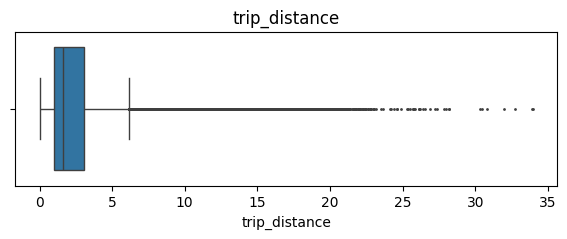

In [15]:
# Create box plot of trip_distance
plt.figure(figsize=(7,2))
plt.title('trip_distance')
sns.boxplot(data=None, x=df['trip_distance'], fliersize=1);

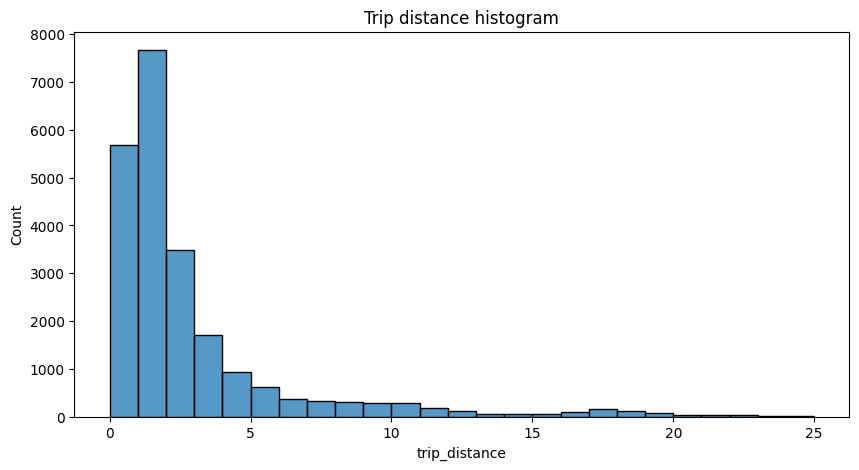

In [16]:
# Create histogram of trip_distance
plt.figure(figsize=(10,5))
sns.histplot(df['trip_distance'], bins=range(0,26,1))
plt.title('Trip distance histogram');

**Note:** The majority of trips were journeys of less than two miles. The number of trips falls away steeply as the distance traveled increases beyond two miles.

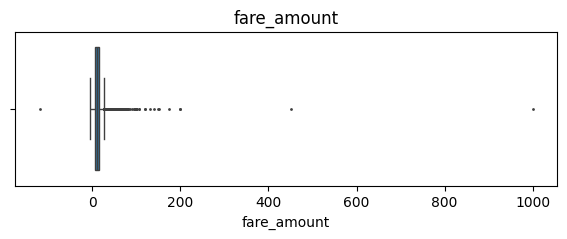

In [17]:
# Create box plot of fare_amount
plt.figure(figsize=(7,2))
plt.title('fare_amount')
sns.boxplot(x=df['fare_amount'], fliersize=1);

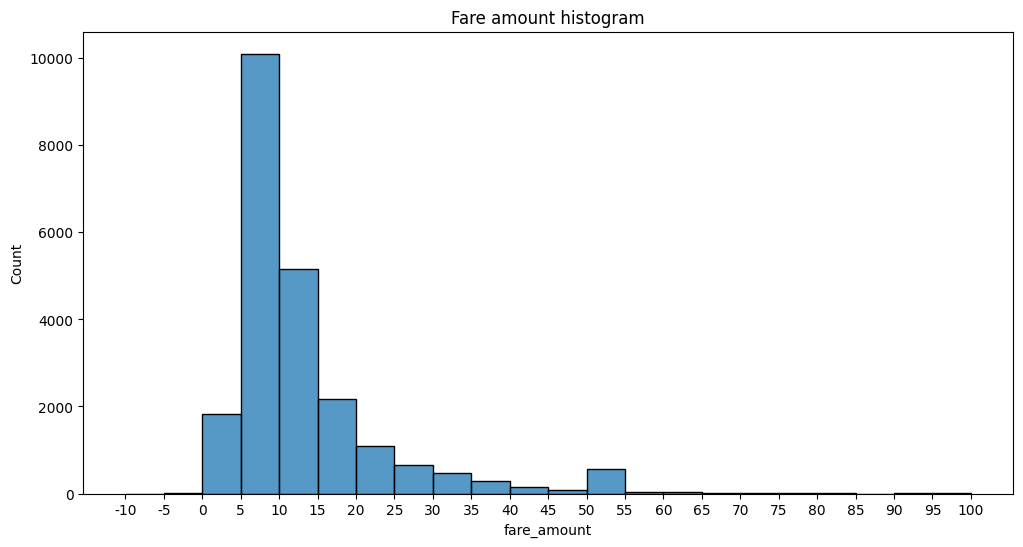

In [18]:
# Create histogram of fare_amount
plt.figure(figsize=(12,6))
ax = sns.histplot(df['fare_amount'], bins=range(-10,101,5))
ax.set_xticks(range(-10,101,5))
ax.set_xticklabels(range(-10,101,5))
plt.title('Fare amount histogram');

**Note:** The fare cost of each trip also has a distribution that skews right, with most costs falling in the $0-15 range.

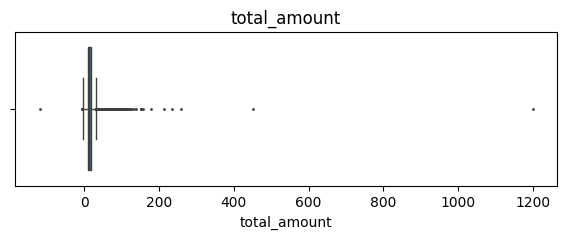

In [19]:
# Create box plot of total_amount
plt.figure(figsize=(7,2))
plt.title('total_amount')
sns.boxplot(x=df['total_amount'], fliersize=1);

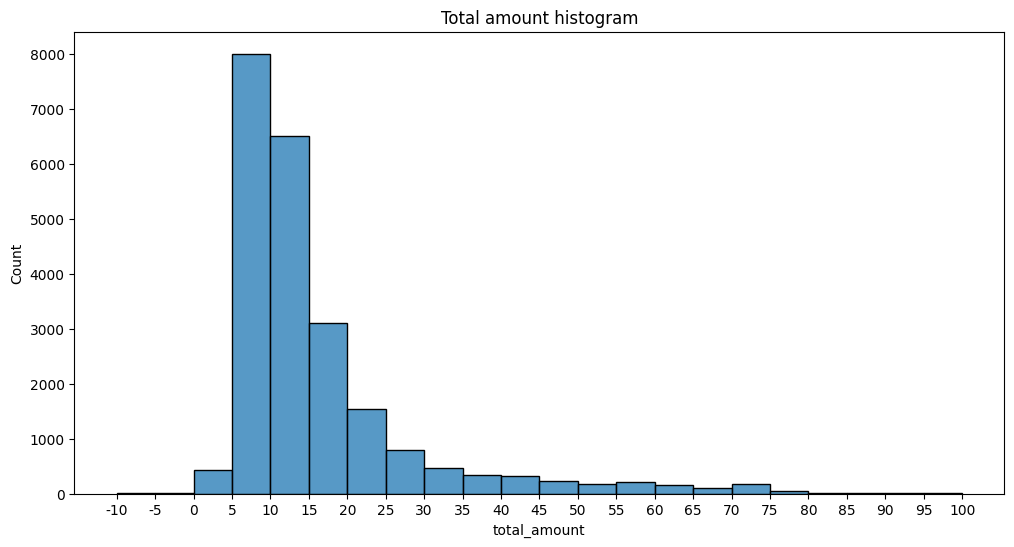

In [20]:
# Create histogram of total_amount
plt.figure(figsize=(12,6))
ax = sns.histplot(df['total_amount'], bins=range(-10,101,5))
ax.set_xticks(range(-10,101,5))
ax.set_xticklabels(range(-10,101,5))
plt.title('Total amount histogram');


**Note:** The total cost of each trip also has a distribution that skews right, with most costs falling in the $5-15 range.

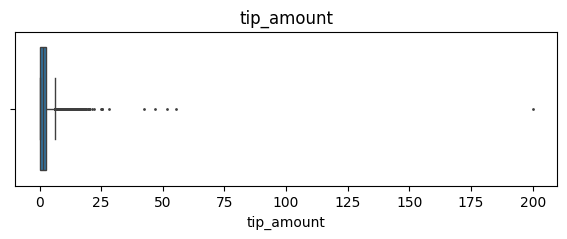

In [21]:
# Create box plot of tip_amount
plt.figure(figsize=(7,2))
plt.title('tip_amount')
sns.boxplot(x=df['tip_amount'], fliersize=1);

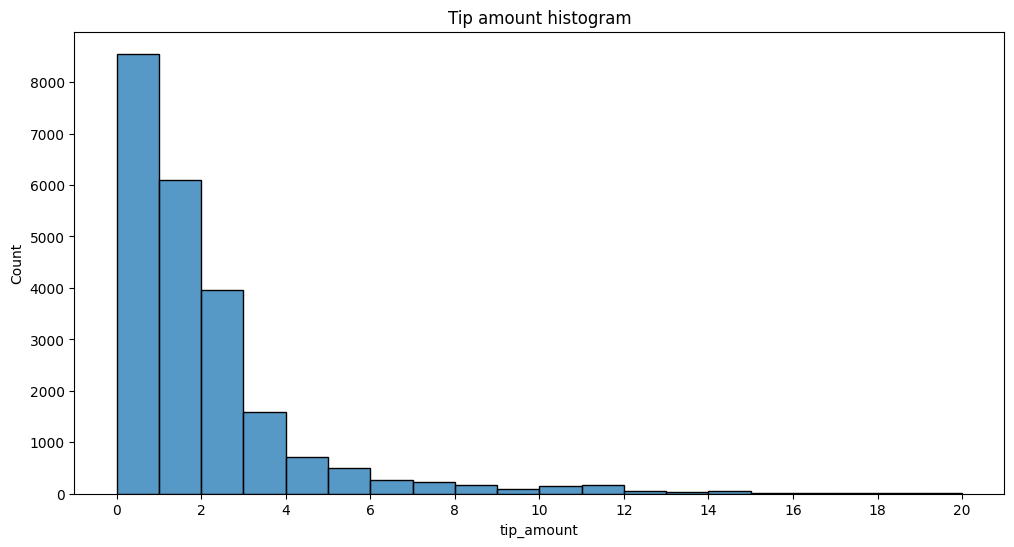

In [22]:
# Create histogram of tip_amount
plt.figure(figsize=(12,6))
ax = sns.histplot(df['tip_amount'], bins=range(0,21,1))
ax.set_xticks(range(0,21,2))
ax.set_xticklabels(range(0,21,2))
plt.title('Tip amount histogram');

**Note:** The distribution for tip amount is right-skewed, with nearly all the tips in the $0-3 range.

## 2.Understanding relation amongst the Variables

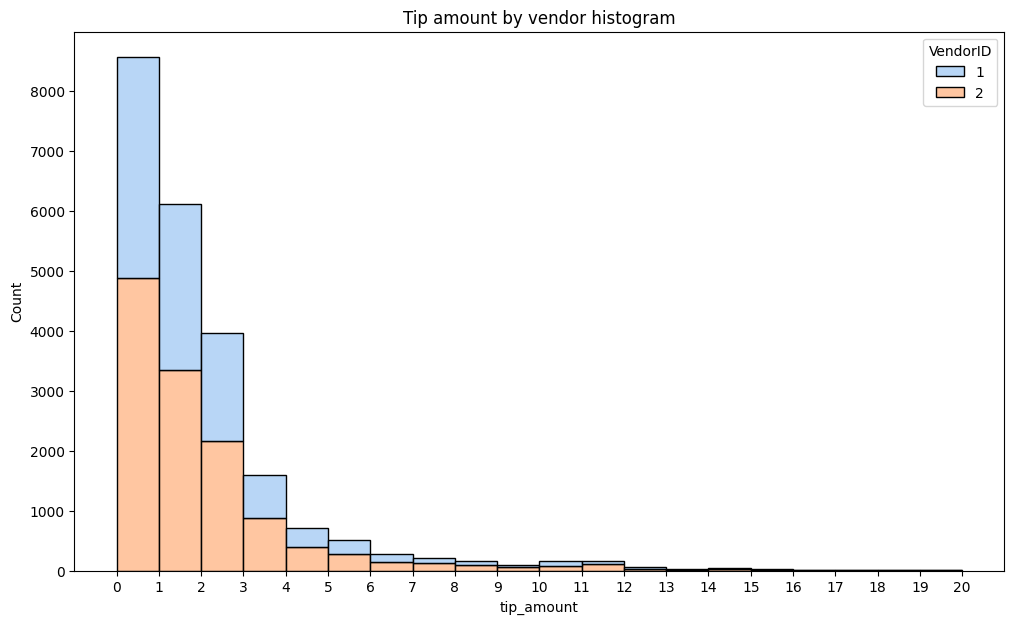

In [23]:
# Create histogram of tip_amount by vendor
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df, x='tip_amount', bins=range(0,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount by vendor histogram');

**Note:** Separating the tip amount by vendor reveals that there are no noticeable aberrations in the distribution of tips between the two vendors in the dataset. Vendor two has a slightly higher share of the rides, and this proportion is approximately maintained for all tip amounts.

Next, zoom in on the upper end of the range of tips to check whether vendor one gets noticeably more of the most generous tips.

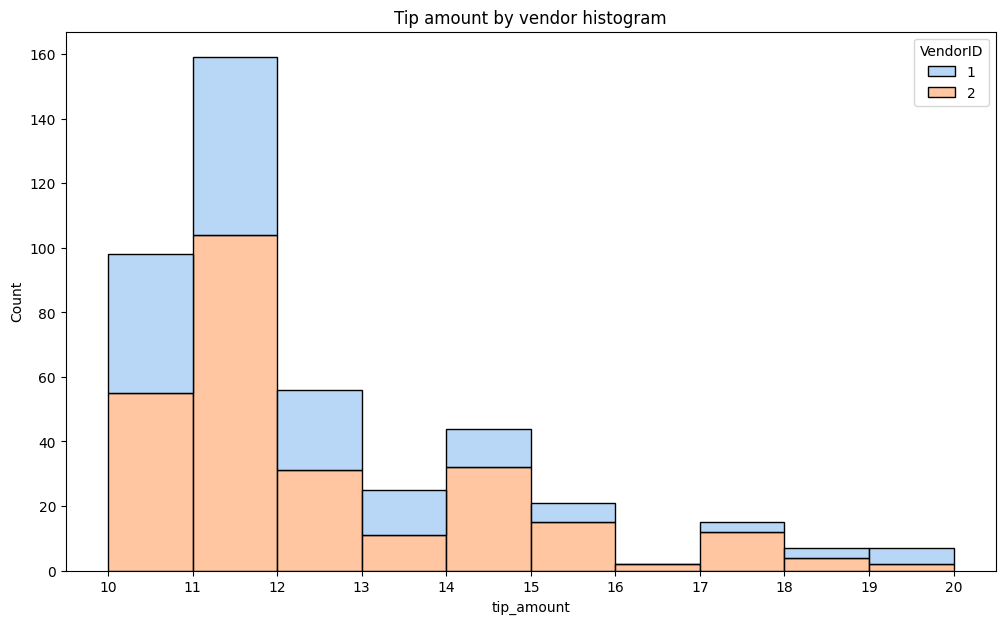

In [24]:
# Create histogram of tip_amount by vendor for tips > $10 
tips_over_ten = df[df['tip_amount'] > 10]
plt.figure(figsize=(12,7))
ax = sns.histplot(data=tips_over_ten, x='tip_amount', bins=range(10,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.title('Tip amount by vendor histogram');

**Note:** The proportions are maintained even at these higher tip amounts, with the exception being at highest extremity, but this is not noteworthy due to the low sample size at these tip amounts.

Examine the unique values in the `passenger_count` column.

In [25]:
df['passenger_count'].value_counts()

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

**Note:** Nearly two thirds of the rides were single occupancy, though there were still nearly 700 rides with as many as six passengers. Also, there are 33 rides with an occupancy count of zero, which doesn't make sense. These would likely be dropped unless a reasonable explanation can be found for them.

In [26]:
# Calculate mean tips by passenger_count
mean_tips_by_passenger_count = df.groupby(['passenger_count']).mean(numeric_only=True)[['tip_amount']]
mean_tips_by_passenger_count

,tip_amount
passenger_count,
0,2.135758
1,1.848920
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


**Note:** Mean tip amount varies very little by passenger count. Although it does drop noticeably for four-passenger rides, it's expected that there would be a higher degree of fluctuation because rides with four passengers were the least plentiful in the dataset (aside from rides with zero passengers).

**Create month and day columns**

In [27]:
# Create a month column
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
# Create a day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

**Plot total ride count by month**

In [28]:
monthly_rides = df['month'].value_counts()
monthly_rides

month
March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: count, dtype: int64

In [29]:
#Reordering the months in calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

monthly_rides = monthly_rides.reindex(index=month_order)

C:\Users\RAIP004\AppData\Local\Temp\ipykernel_22908\665060298.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(month_order)


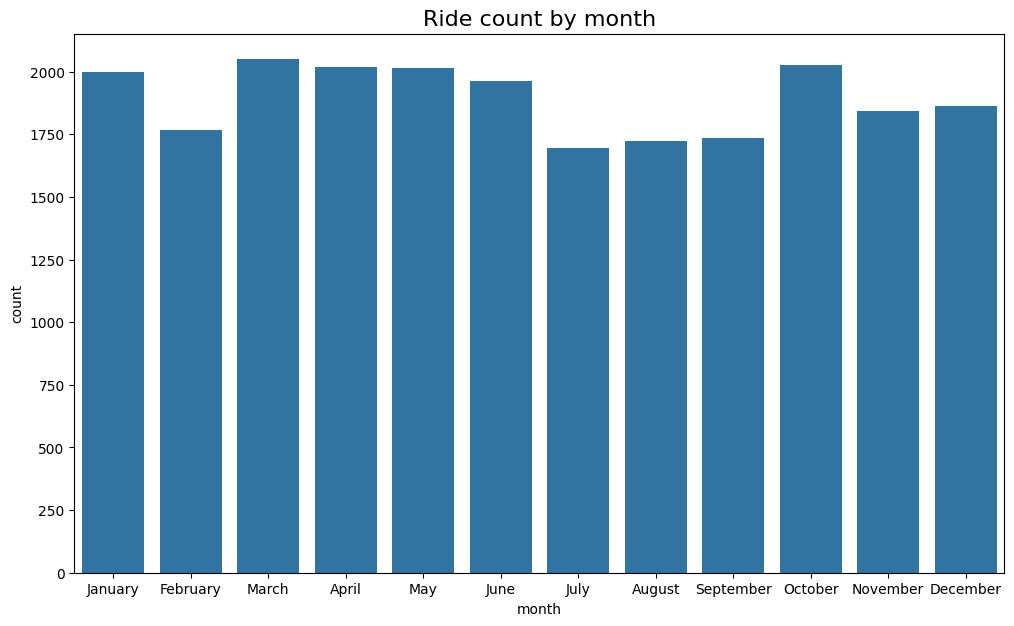

In [30]:
# Create a bar plot of total rides per month
plt.figure(figsize=(12,7))
ax = sns.barplot(x=monthly_rides.index, y=monthly_rides)
ax.set_xticklabels(month_order)
plt.title('Ride count by month', fontsize=16);

**Note:** Monthly rides are fairly consistent, with notable dips in the summer months of July, August, and September, and also in February.

**Plot total ride count by day**

In [31]:
daily_rides = df['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index=day_order)
daily_rides

day
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: count, dtype: int64

C:\Users\RAIP004\AppData\Local\Temp\ipykernel_22908\2425157935.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(day_order)


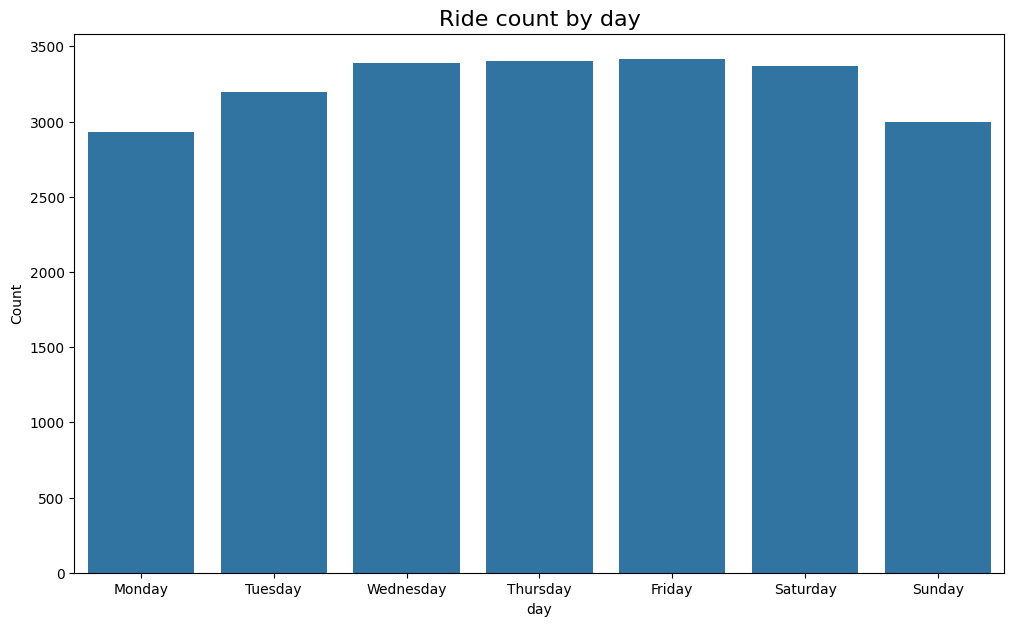

In [32]:
# Create bar plot for ride count by day
plt.figure(figsize=(12,7))
ax = sns.barplot(x=daily_rides.index, y=daily_rides)
ax.set_xticklabels(day_order)
ax.set_ylabel('Count')
plt.title('Ride count by day', fontsize=16);

**Note:** Wednesday through Saturday had the highest number of daily rides, while Sunday and Monday had the least.

## The total rides by day and month could help us understand whether the prices change when more rides are booked in a period and further analysis is required for that

**Plot total revenue by day of the week**

In [33]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_amount_day = df.groupby('day').sum(numeric_only=True)[['total_amount']]
total_amount_day = total_amount_day.reindex(index=day_order)
total_amount_day

,total_amount
day,
Monday,49574.37
Tuesday,52527.14
Wednesday,55310.47
Thursday,57181.91
Friday,55818.74
Saturday,51195.40
Sunday,48624.06


C:\Users\RAIP004\AppData\Local\Temp\ipykernel_22908\410621597.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(day_order)


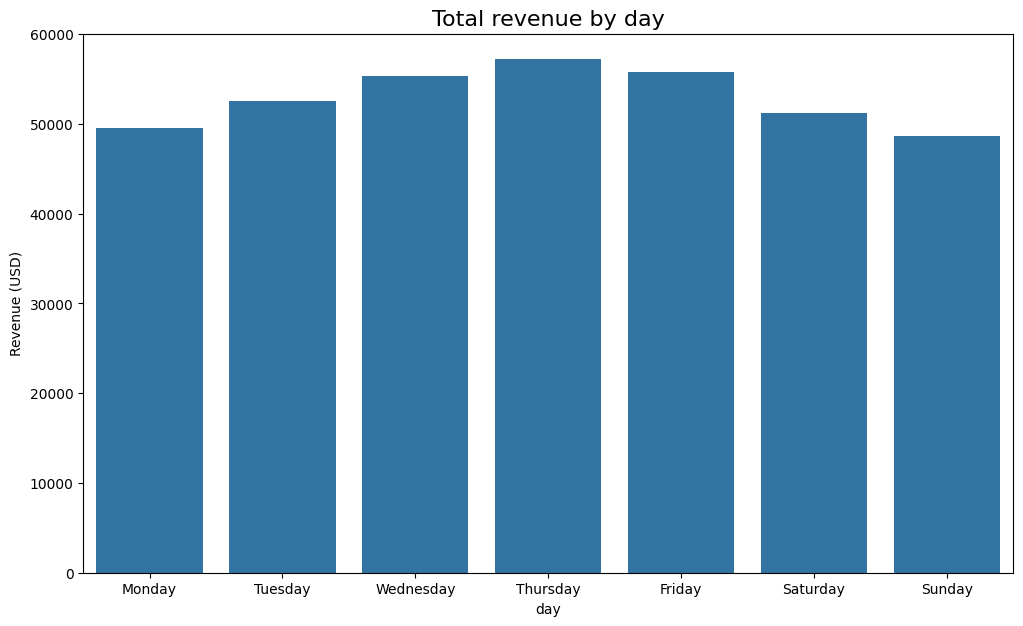

In [34]:
# Create bar plot of total revenue by day
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_day.index, y=total_amount_day['total_amount'])
ax.set_xticklabels(day_order)
ax.set_ylabel('Revenue (USD)')
plt.title('Total revenue by day', fontsize=16);

**Note:** Thursday had the highest gross revenue of all days, and Sunday and Monday had the least. Interestingly, although Saturday had only 35 fewer rides than Thursday, its gross revenue was ~$6,000 less than Thursday's&mdash;more than a 10% drop.

**Plot total revenue by month**

In [35]:
total_amount_month = df.groupby('month').sum(numeric_only=True)[['total_amount']]
total_amount_month = total_amount_month.reindex(index=month_order)
total_amount_month

,total_amount
month,
January,31735.25
February,28937.89
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
August,27759.56
September,28206.38


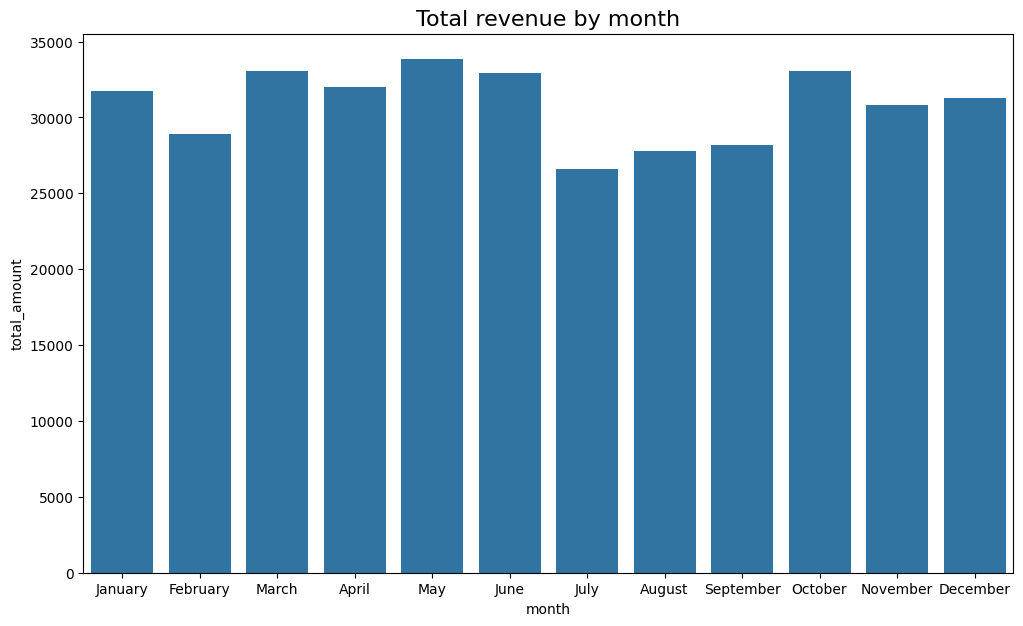

In [36]:
# Create a bar plot of total revenue by month
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_month.index, y=total_amount_month['total_amount'])
plt.title('Total revenue by month', fontsize=16);

**Note:** Monthly revenue generally follows the pattern of monthly rides, with noticeable dips in the summer months of July, August, and September, and also one in February.

**Create Scatter Plot between total_amount and trip_distance to better understand the relationship between them**

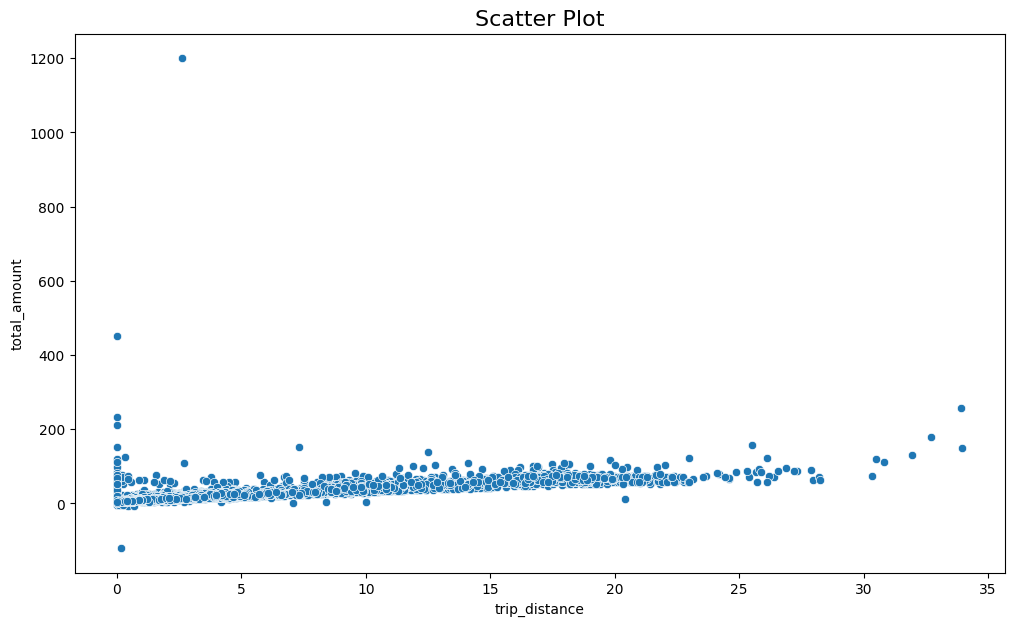

In [37]:
# Create a scatter plot of trip_distance & total_amount
plt.figure(figsize=(12,7))
ax = sns.scatterplot(x='trip_distance',y='total_amount',data=df)
plt.title('Scatter Plot', fontsize=16);

**Plot mean trip distance by drop-off location**

In [38]:
# Get number of unique drop-off location IDs
df['DOLocationID'].nunique()

# Calculate the mean trip distance for each drop-off location
distance_by_dropoff = df.groupby('DOLocationID').mean(numeric_only=True)[['trip_distance']]

# Sort the results in descending order by mean trip distance
distance_by_dropoff = distance_by_dropoff.sort_values(by='trip_distance')
distance_by_dropoff 

,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852
...,...
51,17.310000
11,17.945000
210,20.500000


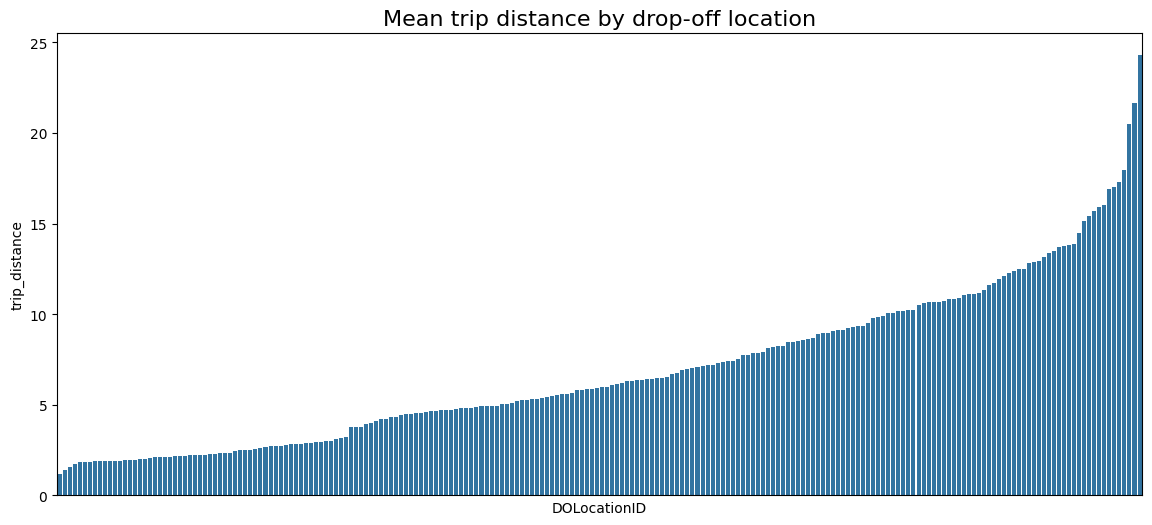

In [39]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance
plt.figure(figsize=(14,6))
ax = sns.barplot(x=distance_by_dropoff.index, 
                 y=distance_by_dropoff['trip_distance'],
                 order=distance_by_dropoff.index)
ax.set_xticklabels([])
ax.set_xticks([])
plt.title('Mean trip distance by drop-off location', fontsize=16);

**Histogram of rides by drop-off location**

In [40]:
# Check if all drop-off locations are consecutively numbered
df['DOLocationID'].max() - len(set(df['DOLocationID'])) 

49

**Note:** There are 49 numbers that do not represent a drop-off location. 

To eliminate the spaces in the historgram that these missing numbers would create, sort the unique drop-off location values, then convert them to strings. This will make the histplot function display all bars directly next to each other. 

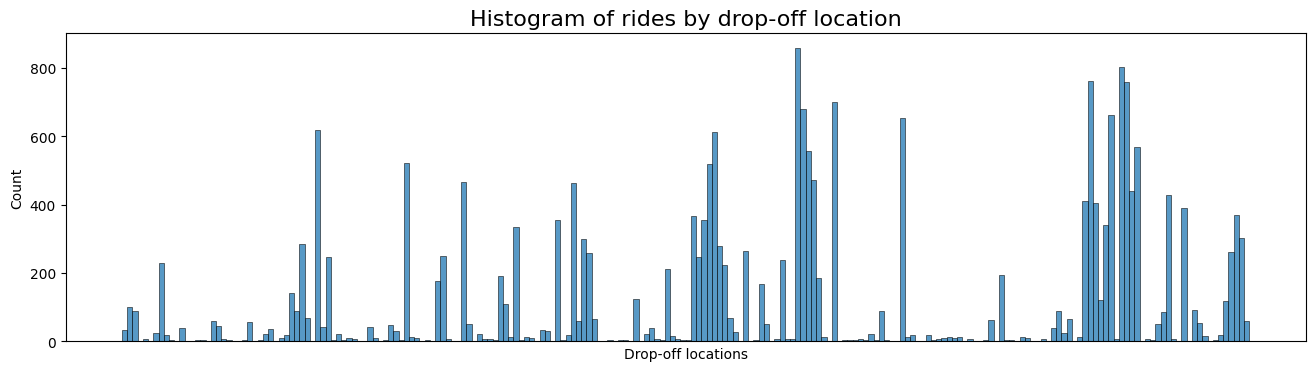

In [41]:
plt.figure(figsize=(16,4))
# DOLocationID column is numeric, so sort in ascending order
sorted_dropoffs = df['DOLocationID'].sort_values()
# Convert to string
sorted_dropoffs = sorted_dropoffs.astype('str')
# Plot
sns.histplot(sorted_dropoffs, bins=range(0, df['DOLocationID'].max()+1, 1))
plt.xticks([])
plt.xlabel('Drop-off locations')
plt.title('Histogram of rides by drop-off location', fontsize=16);

**Note:** Notice that out of the 200+ drop-off locations, a disproportionate number of locations receive the majority of the traffic, while all the rest get relatively few trips. It's likely that these high-traffic locations are near popular tourist attractions like the Empire State Building or Times Square, airports, and train and bus terminals. However, it would be helpful to know the location that each ID corresponds with. Unfortunately, this is not in the data.

## 3.Data Cleaning

1.Outliers and extreme data values can significantly impact linear regression equations. After visualizing data, we substitute extreme data with average data, and/or removing data values greater than 3 standard deviations.

2.Since there are no missing values in the dataset we dont have to impute any.

3.Converting column datatypes and making sure they are in the format as needed by the model.

### Create duration column
Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [42]:
# Create `duration` column
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])/np.timedelta64(1,'m')

### Removing Outliers

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

With our task to check for outliers the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`

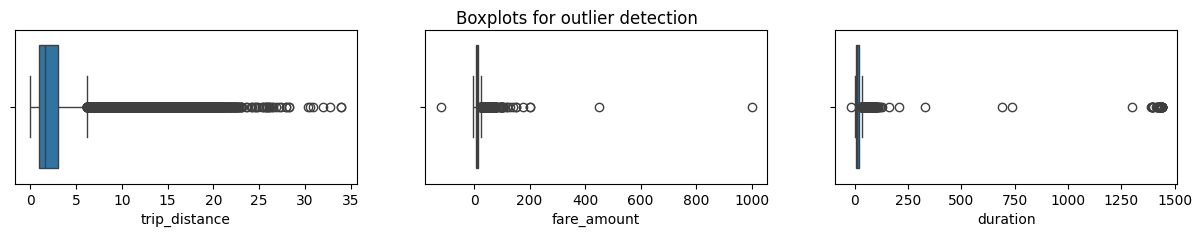

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(15, 2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x=df['trip_distance'])
sns.boxplot(ax=axes[1], x=df['fare_amount'])
sns.boxplot(ax=axes[2], x=df['duration'])
plt.show();

**Note:** It's 30 miles from the southern tip of Staten Island to the northern end of Manhattan and that's in a straight line. With this knowledge and the distribution of the values in this column, it's reasonable to leave these values alone and not alter them. However, the values for `fare_amount` and `duration` definitely seem to have problematic outliers on the higher end.

#### `fare_amount` outliers

In [45]:
df['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

The range of values in the `fare_amount` column is large and the extremes don't make much sense.

* **Low values:** Negative values are problematic. Values of zero could be legitimate if the taxi logged a trip that was immediately canceled.

* **High values:** The maximum fare amount in this dataset is nearly \\$1,000, which seems very unlikely.

The best approach is to substitute negative values with 0 and extreme values with standard formula of `Q3 + (1.5 * IQR)`
Here we use a factor of 6 instead of 1.5 as that produces a more relaistic capped price for taxi.

In [46]:
# Impute values less than $0 with 0
df.loc[df['fare_amount'] < 0, 'fare_amount'] = 0
df['fare_amount'].min()

0.0

Now impute the maximum value as `Q3 + (6 * IQR)`.

In [47]:
def outlier_imputer(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassign minimum to zero
        df.loc[df[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df.loc[df[col] > upper_threshold, col] = upper_threshold
        print(df[col].describe())
        print()

In [48]:
outlier_imputer(['fare_amount'], 6)

fare_amount
q3: 14.5
upper_threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



#### `duration` outliers

In [49]:
df['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [50]:
# Impute a 0 for any negative values
df.loc[df['duration'] < 0, 'duration'] = 0
df['duration'].min()

0.0

In [51]:
# Impute the high outliers
outlier_imputer(['duration'], 6)

duration
q3: 18.383333333333333
upper_threshold: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64



## 4.Feature Engineering


#### Create `mean_distance` column
When deployed, the model will not know the duration of a trip until after the trip occurs, so we cannot train a model that uses this feature. However, we can use the statistics of trips we *do* know to generalize about ones we do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

We begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

In [52]:
# Create `pickup_dropoff` column
df['pickup_dropoff'] = df['PULocationID'].astype(str) + ' ' + df['DOLocationID'].astype(str)
df['pickup_dropoff'].head(2)

0    100 231
1     186 43
Name: pickup_dropoff, dtype: object

Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [53]:
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]
grouped[:5]

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000


In [54]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()

# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']

In [55]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df['mean_distance'] = df['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_distance` column
df['mean_distance'] = df['mean_distance'].map(grouped_dict)


#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [56]:
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]
grouped

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']

df['mean_duration'] = df['pickup_dropoff']
df['mean_duration'] = df['mean_duration'].map(grouped_dict)


#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [57]:
# Create 'rush_hour' col
df['rush_hour'] = df['tpep_pickup_datetime'].dt.hour

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df.loc[df['day'].isin(['saturday', 'sunday']), 'rush_hour'] = 0

In [58]:
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val

In [59]:
# Apply the `rush_hourizer()` function to the new column
df.loc[(df.day != 'saturday') & (df.day != 'sunday'), 'rush_hour'] = df.apply(rush_hourizer, axis=1)
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,month,day,duration,pickup_dropoff,mean_distance,mean_duration,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,March,Saturday,14.066667,100 231,3.521667,22.847222,1
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,April,Tuesday,26.500000,186 43,3.108889,24.470370,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,December,Friday,7.200000,262 236,0.881429,7.250000,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,May,Sunday,30.250000,188 97,3.700000,30.250000,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,April,Saturday,16.716667,4 112,4.435000,14.616667,0


### Isolate modeling variables
Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [60]:
df2 = df.copy()

df2 = df2.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month'
               ], axis=1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


## 5. Understading correlation in the variables

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

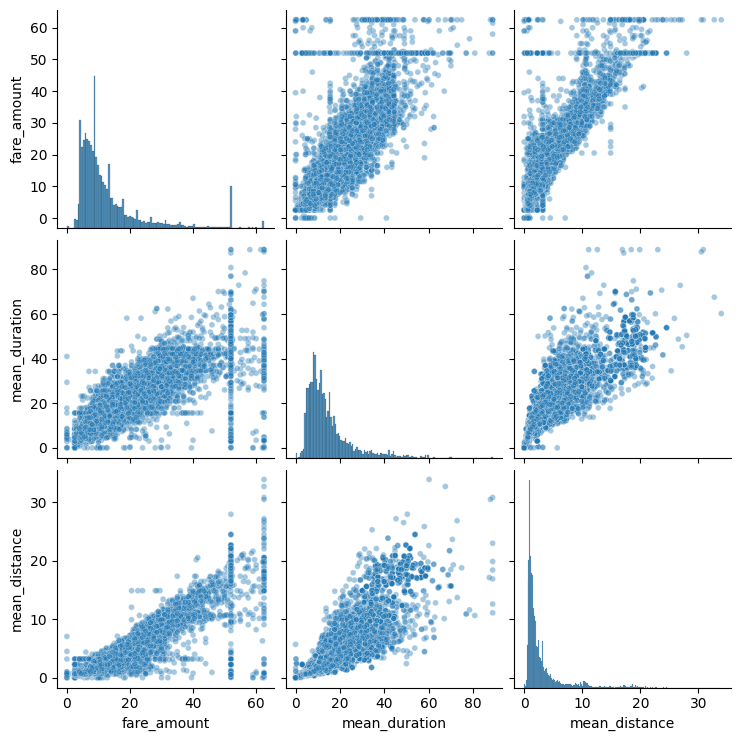

In [61]:
# Create a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(df2[['fare_amount', 'mean_duration', 'mean_distance']],
             plot_kws={'alpha':0.4, 'size':5},
             );

In [62]:
# Create correlation matrix containing pairwise correlation of columns, using pearson correlation coefficient
df2.corr(method='pearson')

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001045,0.004741,0.001876,-0.006550
passenger_count,0.266463,1.000000,0.014942,0.013428,0.015852,-0.011076
fare_amount,0.001045,0.014942,1.000000,0.910185,0.859105,-0.015012
mean_distance,0.004741,0.013428,0.910185,1.000000,0.874864,-0.028227
mean_duration,0.001876,0.015852,0.859105,0.874864,1.000000,-0.016576
rush_hour,-0.006550,-0.011076,-0.015012,-0.028227,-0.016576,1.000000


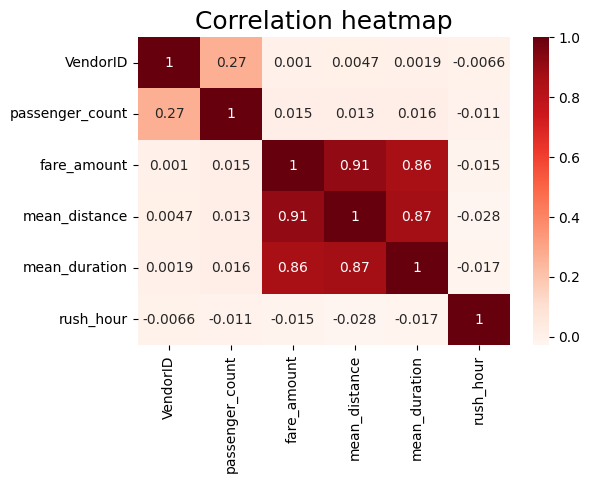

In [63]:
# Create correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df2.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap',
          fontsize=18)
plt.show()

**Note:** `mean_duration` and `mean_distance` are both highly correlated with the target variable of `fare_amount` They're also both correlated with each other, with a Pearson correlation of 0.87.

<img src="Construct.png" width="100" height="100" align=left>

## PACE: **Construct**
After analysis and deriving variables with close relationships, it is time to begin constructing the model.

### Split data into outcome variable and features
Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [64]:
# Remove the target column from the features
X = df2.drop(columns=['fare_amount'])

# Set y variable
y = df2[['fare_amount']]

# Display first few rows
X.head()

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,1
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


### Pre-process data
Dummy encode categorical variables

In [65]:
# Convert VendorID to string
X['VendorID'] = X['VendorID'].astype(str)

# Get dummies
X = pd.get_dummies(X, drop_first=True)
X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,1,True
1,1,3.108889,24.470370,0,False
2,1,0.881429,7.250000,1,False
3,1,3.700000,30.250000,0,True
4,1,4.435000,14.616667,0,True


### Split data into training and test sets
Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [69]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Standardize the data

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [70]:
# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)

X_train scaled: [[-0.50301524  0.8694684   0.17616665 -0.79008842  0.89286563]
 [-0.50301524 -0.60011281 -0.69829589  1.26568112  0.89286563]
 [ 0.27331093 -0.47829156 -0.57301906 -0.79008842 -1.11998936]
 ...
 [-0.50301524 -0.45121122 -0.6788917  -0.79008842 -1.11998936]
 [-0.50301524 -0.58944763 -0.85743597  1.26568112 -1.11998936]
 [ 1.82596329  0.83673851  1.13212101 -0.79008842  0.89286563]]


### Fit the model

Instantiate your model and fit it to the training data.

In [71]:
# Fit your model to the training data
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

### Evaluate model

### Train data
Evaluating model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [72]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.8397756706505115
R^2: 0.8397756706505115
MAE: 2.18928625179541
MSE: 17.897304971443727
RMSE: 4.2305206501616


### Test data
Calculate the same metrics on the test data. Remember to scale the `X_test` data using the scaler that was fit to the training data. Do not refit the scaler to the testing data, just transform it. Call the results `X_test_scaled`.

In [73]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

In [74]:
# Evaluate the model performance on the testing data
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.8680947659893781
R^2: 0.8680947659893781
MAE: 2.1355922651123547
MSE: 14.344244902931342
RMSE: 3.7873796882450725


**Note:** The model performance is high on both training and test sets, suggesting that there is little bias in the model and that the model is not overfiting.

For the test data, an R<sup>2</sup> of 0.868 means that 86.8% of the variance in the `fare_amount` variable is described by the model.

<img src="Execute.png" width="100" height="100" align=left>

## PACE: **Execute**
Presenting the findings of the model and checking model assumptions are valid

### Results
Using the code below we get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [75]:
# Create a `results` dataframe
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
5818,14.0,12.375584,1.624416
18134,28.0,16.336415,11.663585
4655,5.5,6.745509,-1.245509
7378,15.5,16.244218,-0.744218
13914,9.5,10.554608,-1.054608


### Visualize model results

Scatterplot to visualize `actual` vs. `predicted`.

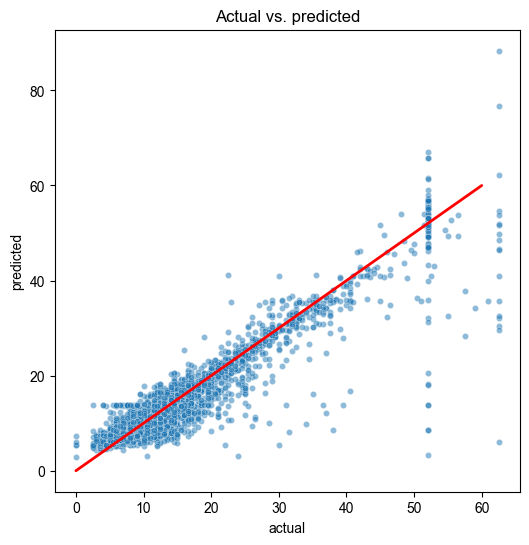

In [76]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

Visualizing the distribution of the `residuals` using a histogram

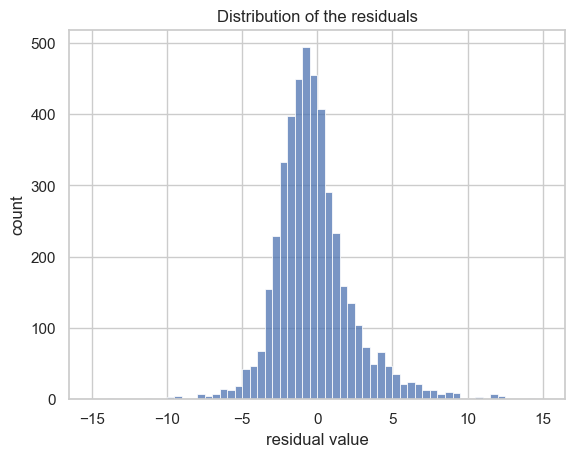

In [77]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

In [78]:
results['residual'].mean()

-0.015460834069770779

**Note:** The distribution of the residuals is approximately normal and has a mean of -0.015. The residuals represent the variance in the outcome variable that is not explained by the model. A normal distribution around zero is good, as it demonstrates that the model's assumption of **Normality of Residuals** is valid

Scatterplot of `residuals` over `predicted`.

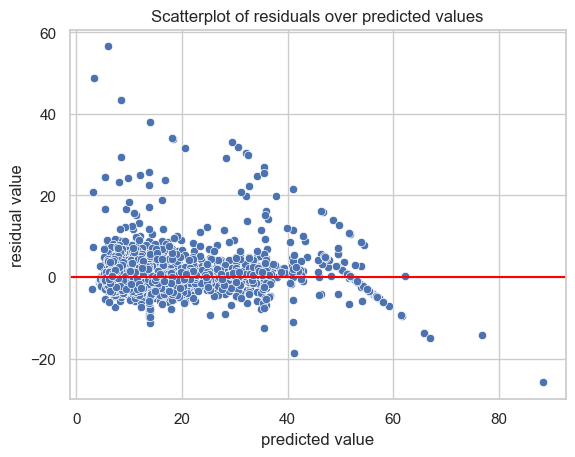

In [79]:
# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

**Note:** The model's residuals are evenly distributed above and below zero, with the exception of the sloping lines from the upper-left corner to the lower-right corner, which are the imputed maximum of \\$62.50 and the flat rate of \\$52 for JFK airport trips. Model's **Homosedacity** assumption is valid

### Coefficients

Using the `coef_` attribute to get the model's coefficients to explain the model

In [80]:
# Get model coefficients
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,0.029178,7.127812,2.816191,0.067449,-0.053939


The coefficients reveal that `mean_distance` was the feature with the greatest weight in the model's final prediction. Because the data used to train the model was standardized with `StandardScaler()`. As such, the units are no longer miles. The correct interpretation of this coefficient is: controlling for other variables, *for every +1 change in standard deviation*, the fare amount increases by a mean of \\$7.13. 

Note also that because some highly correlated features were not removed, the confidence interval of this assessment is wider.

So, after unscaling the data we get a more holistic view

In [81]:
# 1. Calculate SD of `mean_distance` in X_train data
print(X_train['mean_distance'].std())

# 2. Divide the model coefficient by the standard deviation
print(7.133867 / X_train['mean_distance'].std())

3.574812975256415
1.9955916713344426


Now for every 3.57 miles traveled, the fare increased by a mean of \\$7.13. Or, reduced: for every 1 mile traveled, the fare increased by a mean of \\$2.00.

### Conclusion

* Multiple linear regression is a powerful tool to estimate a dependent continous variable from several independent variables.
* Exploratory data analysis is useful for selecting both numeric and categorical features for multiple linear regression.

**Further Analysis**

*  After fitting the Linear Regression model, next step is to explore different models and choose the best model using cross validation and Grid Search CV and then using that Final Model to make predictions on test data.